In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('CLV.csv')

In [3]:
data

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [4]:
data.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


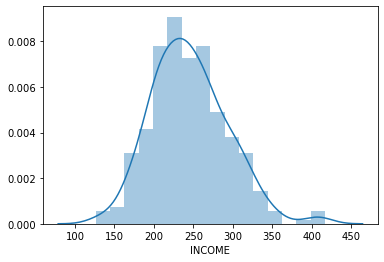

In [9]:
sns.distplot(data['INCOME'])

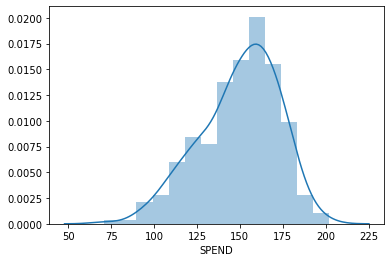

In [10]:
sns.distplot(data['SPEND'])

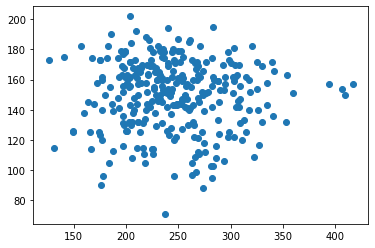

In [11]:
plt.scatter(data['INCOME'],data['SPEND'])

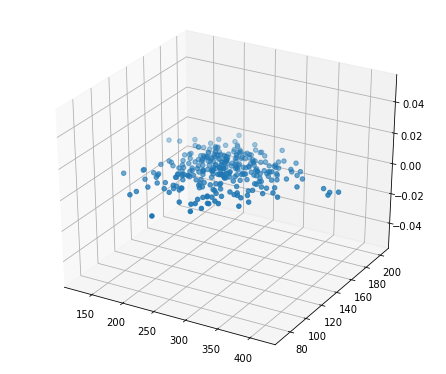

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,5))
ax=Axes3D(fig)
ax.scatter(data['INCOME'],data['SPEND'])

In [14]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(data)


KMeans(n_clusters=3)

In [17]:
label=km.labels_


In [18]:
from sklearn.metrics import silhouette_score
print('Silhouette_score\n')
print(silhouette_score(data,label))

Silhouette_score

0.35962629048722355


In [19]:
label

array([2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1,

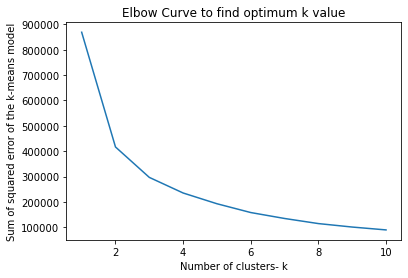

In [20]:
from sklearn.cluster import KMeans
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)
plt.plot(range(1,11),sse)
plt.title('Elbow Curve to find optimum k value')
plt.xlabel('Number of clusters- k')
plt.ylabel('Sum of squared error of the k-means model')
plt.show()

In [22]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(data)
label=km.labels_
from sklearn.metrics import silhouette_score
print('Silhouette_score\n')
print(silhouette_score(data,label))

Silhouette_score

0.44006694211403197


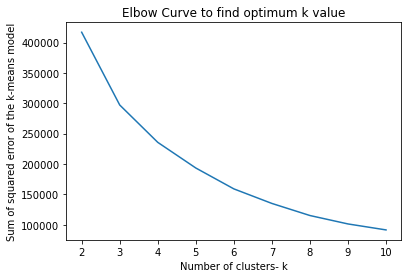

In [26]:
from sklearn.cluster import KMeans
sse=[]
for k in range(2,11):
    km=KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)
    label=km.labels_
   

    plt.plot(range(2,11),sse)
plt.title('Elbow Curve to find optimum k value')
plt.xlabel('Number of clusters- k')
plt.ylabel('Sum of squared error of the k-means model')
plt.show()

In [29]:
for k in range(2,11):
    kmeans=KMeans(n_clusters=k).fit(data)
    label=kmeans.labels_
    sil_coef=silhouette_score(data,label,metric='euclidean')
    print('For n_clusters={},The Silhouette score is {}'.format(k,sil_coef))

For n_clusters=2,The Silhouette score is 0.44006694211403197
For n_clusters=3,The Silhouette score is 0.35962629048722355
For n_clusters=4,The Silhouette score is 0.35271446789203426
For n_clusters=5,The Silhouette score is 0.36165764606767004
For n_clusters=6,The Silhouette score is 0.367075543561368
For n_clusters=7,The Silhouette score is 0.3495599646133863
For n_clusters=8,The Silhouette score is 0.3601303767766271
For n_clusters=9,The Silhouette score is 0.35320029048193946
For n_clusters=10,The Silhouette score is 0.35077184181010135
